# Digital Jackson Pollack's with Python

### Using [Pillow (Python Image Library)](https://github.com/python-pillow/Pillow), this notebook will show you how to generate Jackson Pollack-inspried digital canvases.

### For this demo, I will imitating Jackson Pollack's 1952 *Convergence*

In [1]:
from PIL import Image, ImageDraw
import math
from random import randint as rint
from pollack_functions import *

### Borrow Colors, store RGB values in tuples in list

In [2]:
palette = []
palette.append((206, 179, 146))
palette.append((218, 189, 157))
palette.append((225, 223, 212))
palette.append((19, 20, 15))
palette.append((11, 7, 22))
palette.append((36, 74, 114))
palette.append((193, 175, 84))
palette.append((222, 90, 65))

### Get dimensions, store as integers

In [3]:
# Convergence is 155" x 93.5
width = 800 # 8 inches
height = int(width * (93.5/155))

### Specify how many splatters you would like on your canvas

In [4]:
num_splatters = 5000

### Paint, store as NumPy Array

In [5]:
painting = jackson_pollack(width, height, len(palette), num_splatters)

### Write to Pillow's Image class by iterating through your painting

In [6]:
picture = create_pollack_image(canvas=painting,palette=palette)

### View

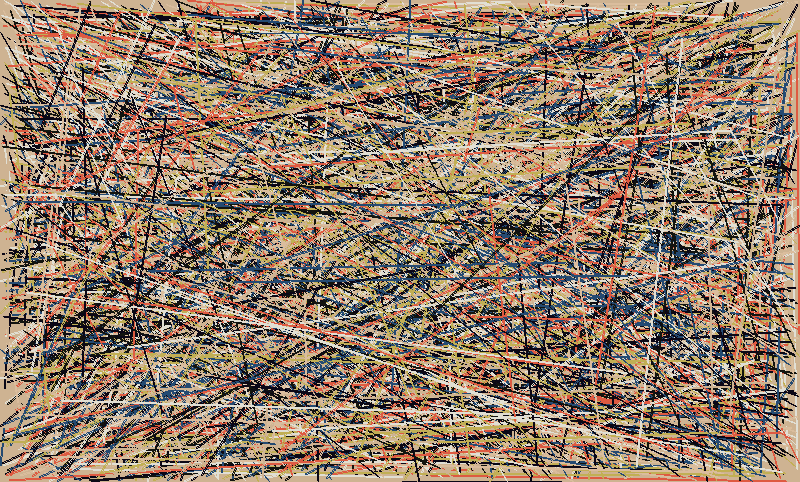

In [7]:
picture

### Add a white border/frame around your Image (nice for printing)

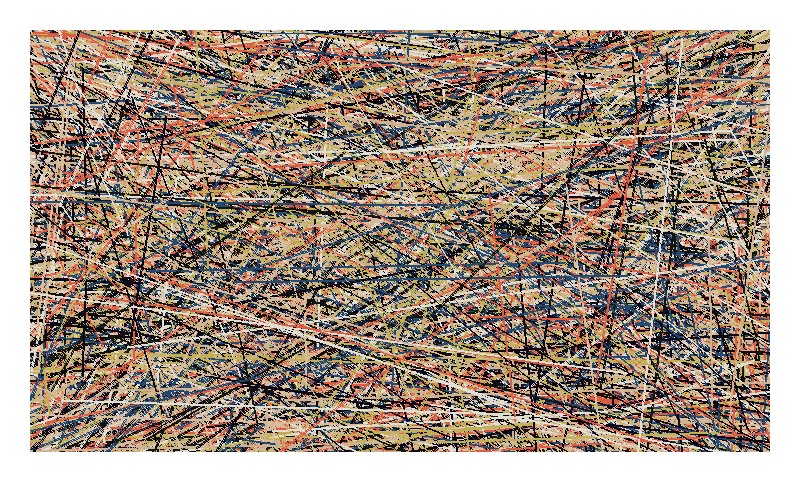

In [8]:
add_border_to_image(picture,inplace=True)
picture

### Write to file and save

In [9]:
picture.save("convergence.png", "PNG")

# Generate Images with randomized colors

### I you do not want to select your color palette, simply leave out the palette argument when initializing your Image.

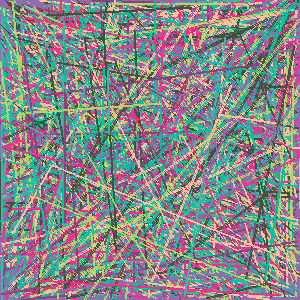

In [12]:
canvas = jackson_pollack(300, 300, 8, 5000)

picture_random_colors = create_pollack_image(canvas=canvas)

picture_random_colors

In [13]:
picture_random_colors.save("random_colors_6.png", "PNG")